<a href="https://colab.research.google.com/github/pulkit22022000/SMOTE_implementation/blob/main/SMOTE_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMOTE**  **TECHNIQUE**

Any machine learning practitioner working with binary classification problems must have come across this typical situation of an imbalanced dataset. This is a typical scenario seen across many valid business problems like fraud detection, spam filtering, rare disease discovery, hardware fault detection, etc. Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class).

<img src="https://editor.analyticsvidhya.com/uploads/21081image10.png" alt text="alter"/>

Generally, the minority/positive class is the class of interest and we aim to achieve the best results in this class rather. If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.



**Resampling Data** is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this:
1. Undersampling 
2. Oversampling

In most cases, *Oversampling* is preferred over Undersampling Techniques. The reason being, in Undersampling we tend to remove instances from data that may be carrying some important information.



**SMOTE (Synthetic Minority Oversampling Technique)**

This technique was described by Nitesh Chawla, K. W. Bowyer, L. O. Hall, W. P. Kegelmeyer in their 2002 paper named for the technique titled [“SMOTE: Synthetic Minority Over-sampling Technique”](https://arxiv.org/abs/1106.1813).

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

<img src="https://iq.opengenus.org/content/images/2019/09/COVER-1.PNG" alt text="temp"/>

SMOTE first selects a minority class instance *a* at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors *b* at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances *a* and *b*.

This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.




In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


**Data** **Preparation**


*   Remap *gender*, *car*, and *reality* to integers (0, 1) – these columns have only two possible values.
*   Create dummy variables for *income_type*, *education_type*, *family_name*, *house_type* – to go from strings to binary (0, 1).

*   Drop unnecessary columns — *Unnamed: 0*, *ID*, and every column for which you created dummy variables.
*   Merge all into a single data frame.






In [10]:
# Remap to integers
df['GENDER'] = [0 if x == 'M' else 1 for x in df['GENDER']]
df['CAR'] = [1 if x == 'Y' else 0 for x in df['CAR']]
df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]

# Create dummy variables
dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)

# Drop unnecessary columns
to_drop = ['Unnamed: 0', 'ID', 'FLAG_MOBIL', 'INCOME_TYPE',
           'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
df.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
merged = pd.concat([df, dummy_income_type, dummy_edu_type, dummy_family_type, dummy_house_type], axis=1)
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,INC_TYPE_Pensioner,INC_TYPE_State servant,INC_TYPE_Student,INC_TYPE_Working,EDU_TYPE_Higher education,EDU_TYPE_Incomplete higher,EDU_TYPE_Lower secondary,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0,112500.0,0,0,0,2.0,29,59,3,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,270000.0,0,1,1,1.0,4,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,270000.0,0,1,1,1.0,26,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0,270000.0,0,1,1,1.0,26,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0,270000.0,0,1,1,1.0,38,52,8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


Better, but still needs a bit of work. Notice how larger the values are in *income* than in *no_of_child*.

You’ll use *MinMaxScaler* from *scikit*-*learn* to scale columns that have values greater than 1 to [0, 1] range. Here’ how:

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    merged[col] = scaled[col]
    
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,INC_TYPE_Pensioner,INC_TYPE_State servant,INC_TYPE_Student,INC_TYPE_Working,EDU_TYPE_Higher education,EDU_TYPE_Incomplete higher,EDU_TYPE_Lower secondary,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0.0,0.055233,0,0,0,0.052632,0.483333,0.826087,0.069767,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0.0,0.156977,0,1,1,0.000000,0.066667,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0.0,0.156977,0,1,1,0.000000,0.633333,0.673913,0.186047,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


Much better — everything is in the [0, 1] range, all columns are numerical, and there are no missing values.
This means one thing — the dataset is machine learning ready.

**Machine** **Learning** **without SMOTE** :

Let’s start with a naive approach. We’ll create a Random Forest model on the dataset and completely ignore the class imbalance.

To start, you’ll have to split the dataset into training and testing portions. There’s only 1.68% of fraud transactions in the entire dataset. Ideally, you want the percentage roughly the same in the train and test sets.

Here’s how to do the split and check the percentage of the positive class:


In [12]:
from sklearn.model_selection import train_test_split

X = merged.drop('TARGET', axis=1)
y = merged['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 1.69
% Positive class in Test  = 1.65


Onto the modeling now. Let’s make it as simple as possible. You’ll train a Random Forest classifier on the train set and evaluate it on the test set. Confusion matrix, accuracy score, and recall score will tell you just how bad is it:

Accuracy = 0.98
Recall = 0.09



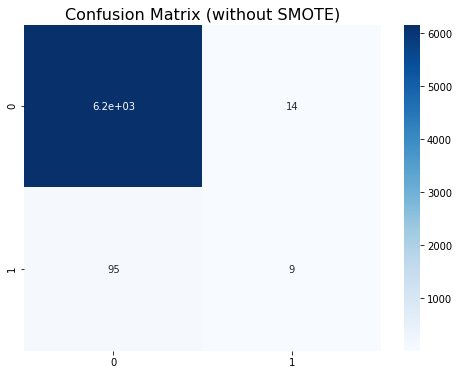

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

The model is **98%** accurate, so where’s the problem?

Yes, it can correctly classify almost all genuine transactions. But it also classified 91% of fraud transactions as genuine. In a nutshell — the model is unusable.

Class imbalance killed its performance. SMOTE can help.

**Machine Learning with SMOTE**

We already saw what SMOTE is, and now we’ll see how to install it and use it.

In [14]:
!pip install imbalanced-learn

You can now apply SMOTE to features (X) and the target (y) and store the results in dedicated variables. The new feature and target set is larger, due to oversampling. Here’s the code for applying SMOTE:

In [20]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 318
Before OverSampling, counts of label '0': 18532 

After OverSampling, the shape of train_X: (37064, 29)
After OverSampling, the shape of train_y: (37064,) 

After OverSampling, counts of label '1': 18532


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '0': 18532


There are 37K data points instead of 25K, and the class balance is perfect — 50:50. You’ll train the model on a new dataset next:

Accuracy = 0.99
Recall = 0.99



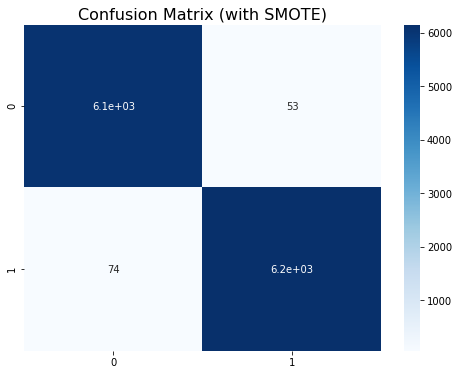

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

The resulting model is usable, to say at least. SMOTE did its job, and it resulted in a model that significantly outperformed its previous version.